## Assignment 3

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Importing helper functions

In [2]:
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import os
import pandas as pd
import pylab as pl
from sklearn import decomposition

In [3]:
def load_images(img_dir, grayscale=False):
    """Loads images from within a specified directory.

    Args:
      img_dir (str): The directory from which to load (.jpg) images.
      grayscale (bool): Whether to convert the image into grayscale. Defaults to False.

    Returns:
      images: An array of image objects loaded from the specified directory

    """
    images = []

    for file in os.listdir(img_dir):
        if file.endswith(".jpg"):
            im = Image.open(os.path.join(img_dir, file))

            im = im.resize((100, 100))

            if grayscale:
                im = np.array(im, dtype=np.float64) / 255

                # Convert image to grayscale
                r, g, b = im[:,:,0], im[:,:,1], im[:,:,2]
                gray = 0.2989*r + 0.5870*g + 0.1140*b
                im = gray.reshape((1, -1))[0]

            images.append(im)

    return images

def plot_image_space(images, X, title="Projection of the Images into 2 Dimensions"):
    """Generates and shows a plot of images in a feature space.
    
    A figure with one plot is generated. The plot displays the location of each image in 
    relation to the image's feature values in the input feature space (X).

    Args:
      images (Image): An image.
      images (SciPy array): An array of SSQs, one computed for each k.

    """
    # min-max normalization    
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    # Create a figure
    pl.figure(figsize=(16, 5))
    ax = pl.subplot(111)
    #ax.axis('off')

    # Generate picture thumbnails in the plot
    if hasattr(matplotlib.offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        for i in range(len(images)):
            imagebox = matplotlib.offsetbox.OffsetImage(images[i], zoom=.65)
            ab = matplotlib.offsetbox.AnnotationBbox(imagebox, X[i][0:2])                                  
            ax.add_artist(ab)

    # Add figure labels and ticks
    pl.title(title, fontsize=16)
    pl.xticks([]), pl.yticks([])

    # Add figure bounds
    pl.ylim((np.min(X, axis=0)[1])-0.25,(np.max(X, axis=0)[1])+0.25)
    pl.xlim((np.min(X, axis=0)[0])-0.1,(np.max(X, axis=0)[0])+0.1)

### Loading images:

In [4]:
img_dir = 'D:/NEU/DataMining/Assignment 3/images'
images = load_images(img_dir) # load images in the specified directory

In [5]:
X = pd.DataFrame([im.histogram() for im in images])
X2 = decomposition.PCA(n_components = 2)
X_final = X2.fit_transform(X)

### Part 1

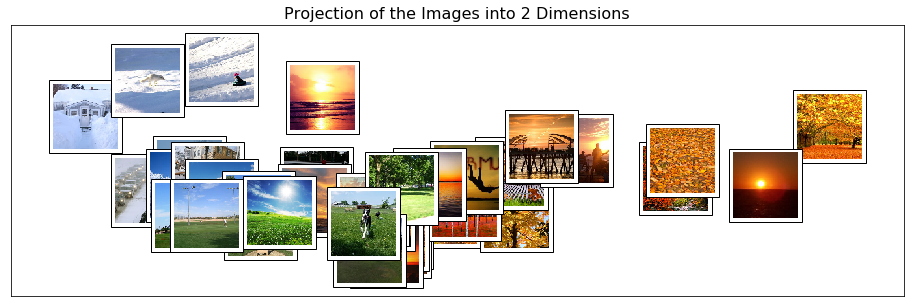

In [6]:
plot_image_space(images, X_final)

### Part 2
#### Question: 
Given this output, What does it mean for two images to be close together in this plot? What does it mean for two images to be far apart?

#### Answer: 
If two images are close together in this plot it means that they have a similar color histogram, same way if two images are far apart it means they have a different color histogram. Each color has 256 possible values, resulting in a histogram of 768 color values distributed over entire range of 65,000 pixels. Each value of the histogram is the number of pixels in the image with the corresponding color value. Here, we would consider each histogram value as a feature of an image. By performing PCA on an image histogram, we are only reducing an image from a set of 768 unique histogram values to a new 2-dimensional space. As a result of this transformation, images that have a similar histogram appear to be closer in the plot and images that have a different histogram appear to be far apart in the plot.

### Part 3

In [7]:
img_dir3 = 'D:/NEU/DataMining/Assignment 3/images_part3'
images_part3 = load_images(img_dir3) # load images in the specified directory

In [8]:
Y = pd.DataFrame([im.histogram() for im in images_part3])
Y2 = decomposition.PCA(n_components = 2)
Y_final = Y2.fit_transform(Y)

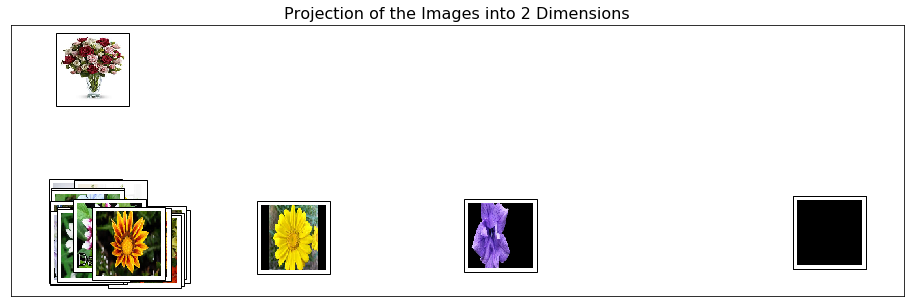

In [9]:
plot_image_space(images_part3, Y_final)